In [1]:
from dataset import Dataset
import vectorbt as vbt
import pandas as pd
import numpy as np
import quantstats as qs
vbt.settings.set_theme('dark')

In [2]:
TICKER = 'BTCUSDT'
data_binance = Dataset().get_data(days=360, ticker=TICKER, ts='1h')

In [3]:
data = data_binance.copy()


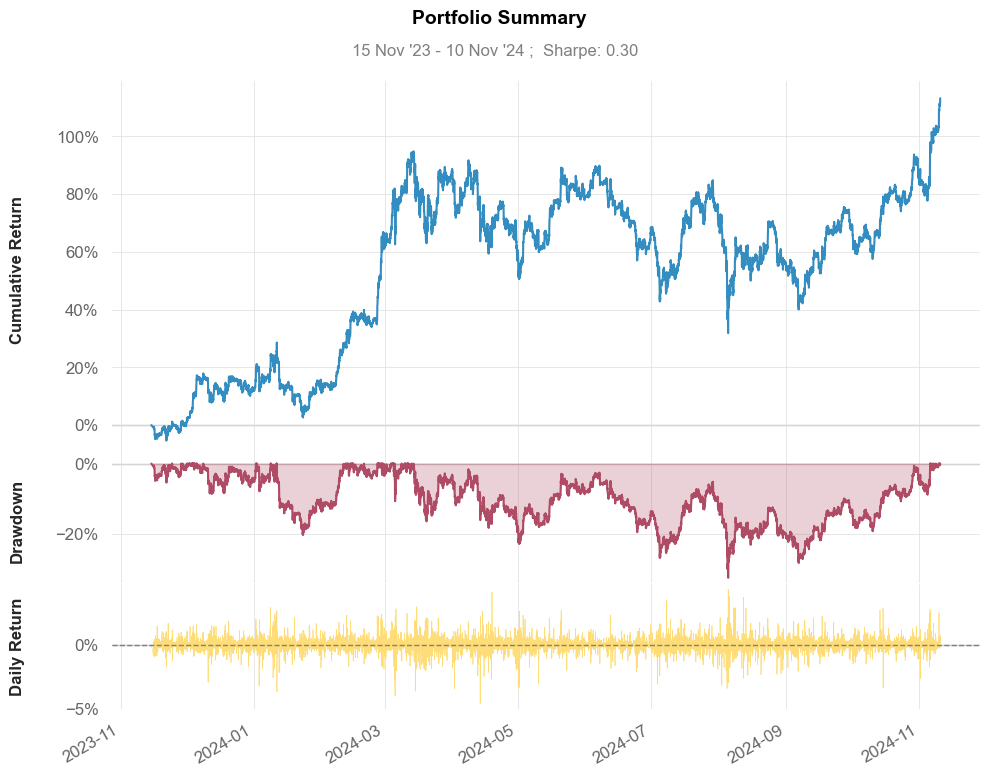

In [4]:
returns = data['close'].vbt.to_returns()
returns.vbt.returns.qs.plot_snapshot()

In [5]:
vbt.RSI.run(close=data['close']).plot(height=400, width=1300).show()


In [6]:
rsi = vbt.RSI.run(data['close'], short_name='RSI')
rsi_bottom = 20
rsi_top = 80
entries = rsi.rsi_below(rsi_bottom)
exits = rsi.rsi_above(rsi_top)
pf = vbt.Portfolio.from_signals(data['close'], entries, exits, fees=0.001)

In [7]:
pf.plot(height=400, width=1300).show()


In [8]:
pf.drawdown().vbt.plot(height=400, width=1300).show()


In [9]:
pf.trades.plot(height=400, width=1300).show()


In [10]:
hold_entries = pd.Series.vbt.signals.empty_like(entries)
hold_entries.iloc[0] = True
hold_exits = pd.Series.vbt.signals.empty_like(hold_entries)
hold_exits.iloc[-1] = True
hold_pf = vbt.Portfolio.from_signals(data['close'], hold_entries, hold_exits, fees=0.001)

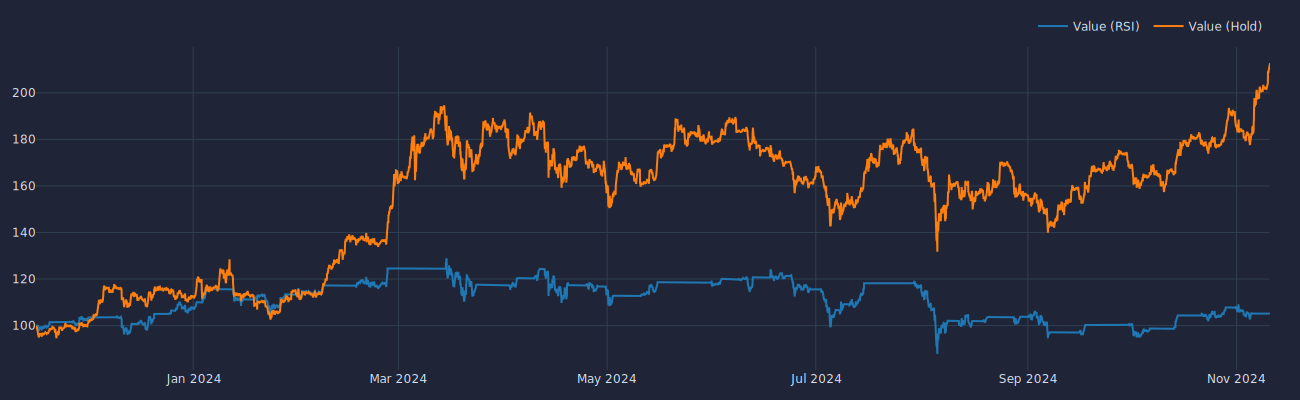

In [11]:
# hold_pf.returns_stats()
fig = pf.value().vbt.plot(trace_kwargs=dict(name='Value (RSI)'))
hold_pf.value().vbt.plot(trace_kwargs=dict(name='Value (Hold)'), fig=fig, height=400, width=1300).show_svg()

In [12]:
grid = np.arange(20, 90, 5)
rsi = vbt.RSI.run(data['close'], short_name='RSI')
rsi_top, rsi_bottom = vbt.RSI.run_combs(
    data['close'],
    window=grid,
    short_names=['RSI_top', 'RSI_bottom']
)
entries = rsi.rsi_below(rsi_bottom)
exits = rsi.rsi_above(rsi_top)
pf_kwargs = dict(size=np.inf, fees=0, freq='1h')
pf = vbt.Portfolio.from_signals(
    data['close'],
    entries,
    exits,
    **pf_kwargs)

<Axes: xlabel='time'>

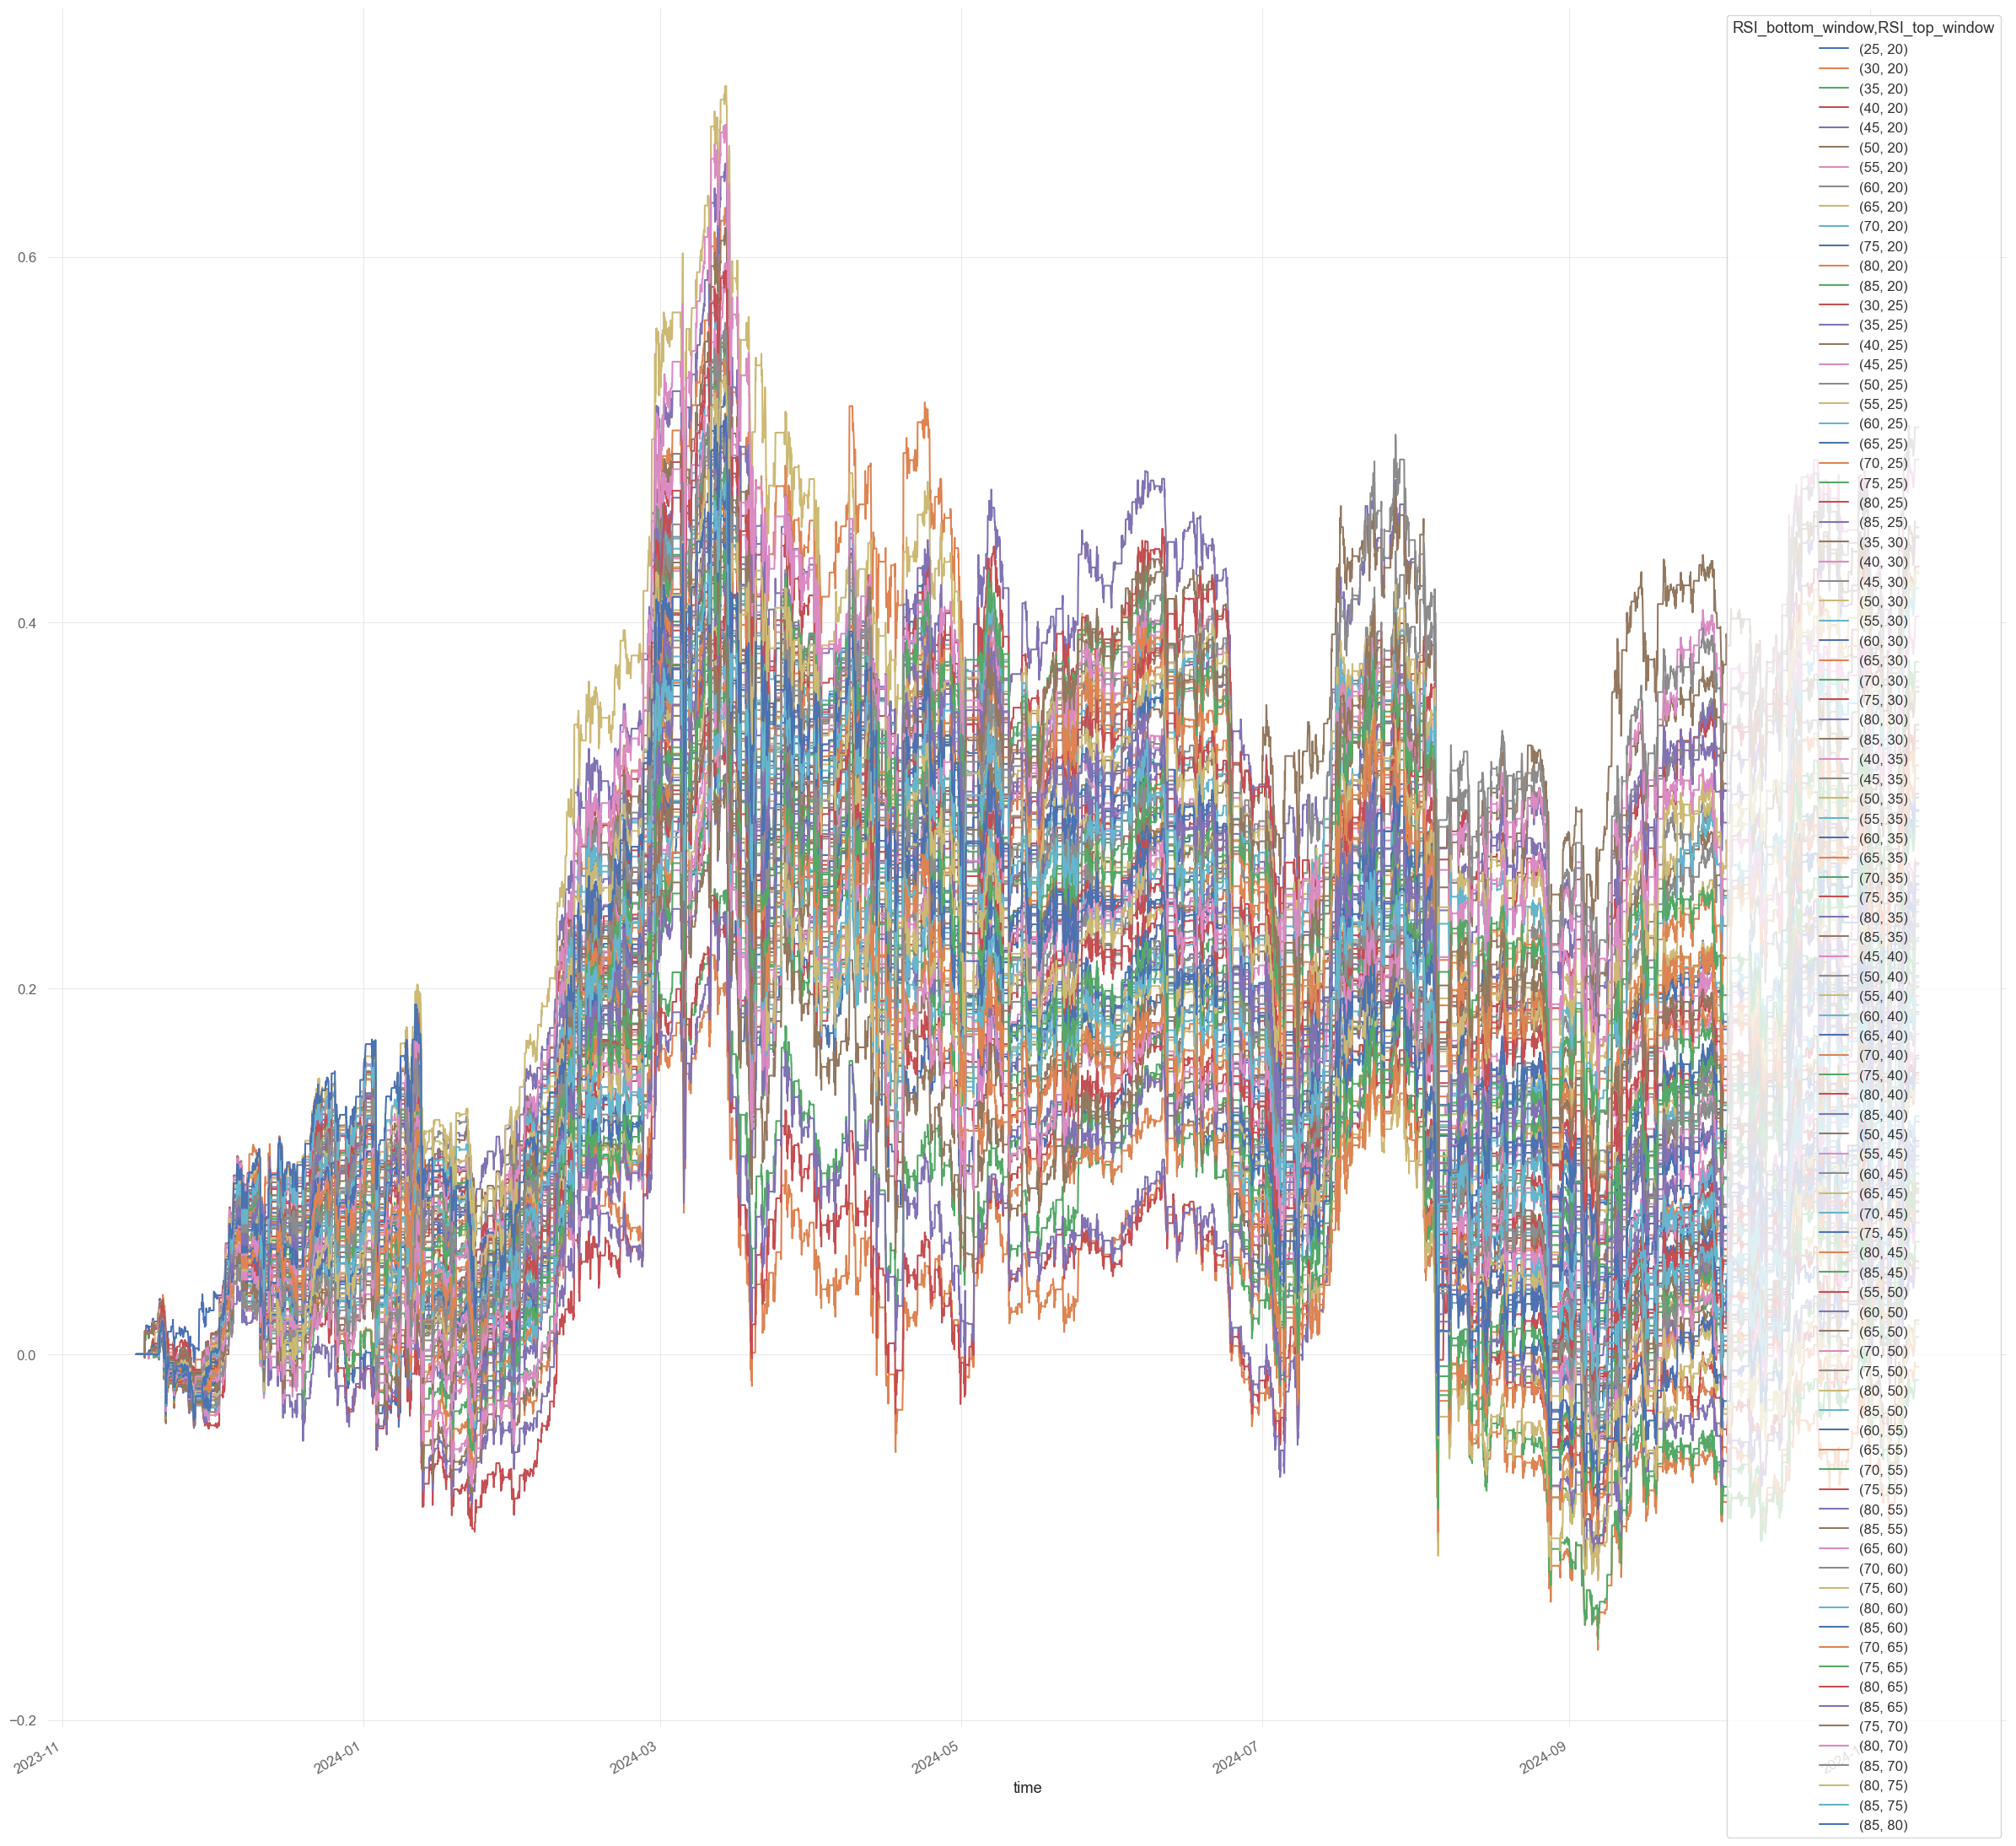

In [13]:
pf.cumulative_returns().plot(figsize=(30, 30))


In [14]:
fig = pf.total_return().vbt.heatmap()
fig.show()

c:\Users\pc\Desktop\trading\.venv\Lib\site-packages\jupyter_client\session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



In [15]:
hold_pf.returns_stats

<bound method Portfolio.returns_stats of <vectorbt.portfolio.base.Portfolio object at 0x000002BAD125ECF0>>